<a href="https://colab.research.google.com/github/victorhss21/CSV_to_PARQUET/blob/main/LTC_e_Teste_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gerando dados não paramétricos

In [6]:

import numpy as np
import pandas as pd

# Setting a seed for reproducibility
np.random.seed(42)

# Generating 10000 samples with a skewed distribution (e.g., exponential)
data1 = np.random.exponential(scale=2.0, size=10000)
data2 = np.random.exponential(scale=3.5, size=10000)

# Creating a DataFrame 1
df1 = pd.DataFrame(data1, columns=["Non_Normal_Distribution"])


# Creating a DataFrame 2
df2 = pd.DataFrame(data2, columns=["Non_Normal_Distribution"])

## Histograma dos dados

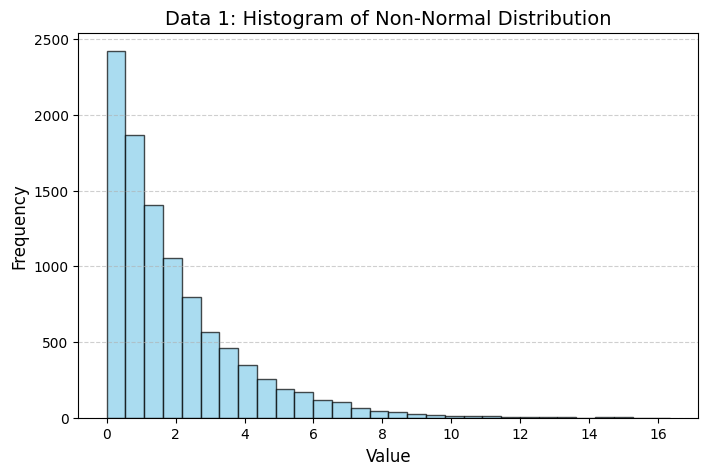

In [7]:
import matplotlib.pyplot as plt

# Plotting the histogram of the dataset
plt.figure(figsize=(8, 5))
plt.hist(data1, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Data 1: Histogram of Non-Normal Distribution", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

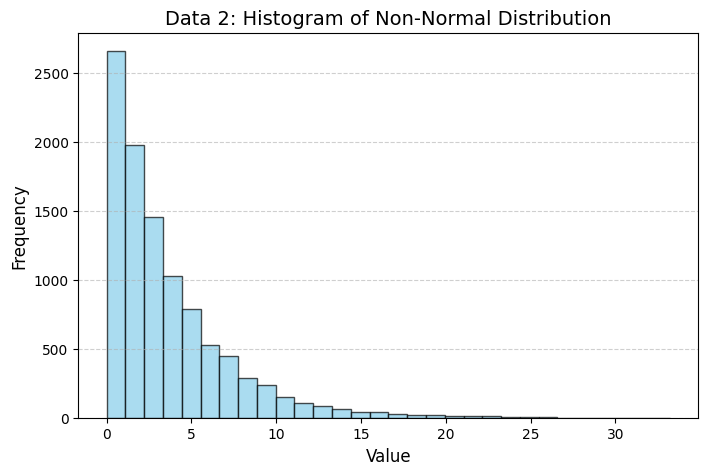

In [8]:

import matplotlib.pyplot as plt

# Plotting the histogram of the dataset
plt.figure(figsize=(8, 5))
plt.hist(data2, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Data 2: Histogram of Non-Normal Distribution", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Aplicando LTC

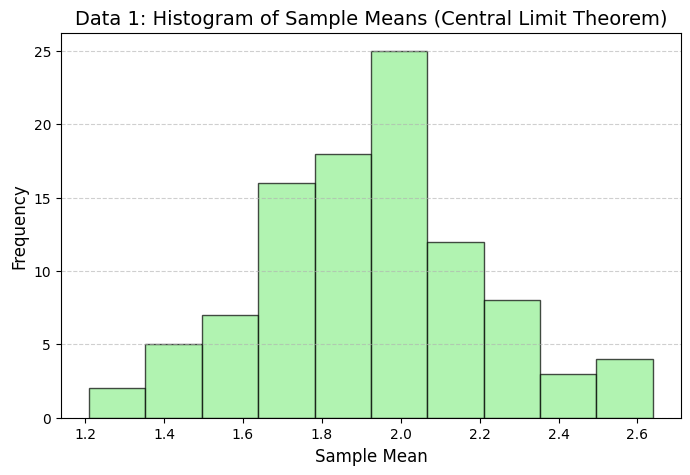

In [35]:

# Specify number of observations and size of samples
size = 50
n_samples = 100

# Generating 50 samples of size 50 each from the original data
sample_means1 = [np.random.choice(data1, size=size, replace=False).mean() for _ in range(n_samples)]

# Plotting the histogram of the sample means
plt.figure(figsize=(8, 5))
plt.hist(sample_means1, bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Data 1: Histogram of Sample Means (Central Limit Theorem)", fontsize=14)
plt.xlabel("Sample Mean", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

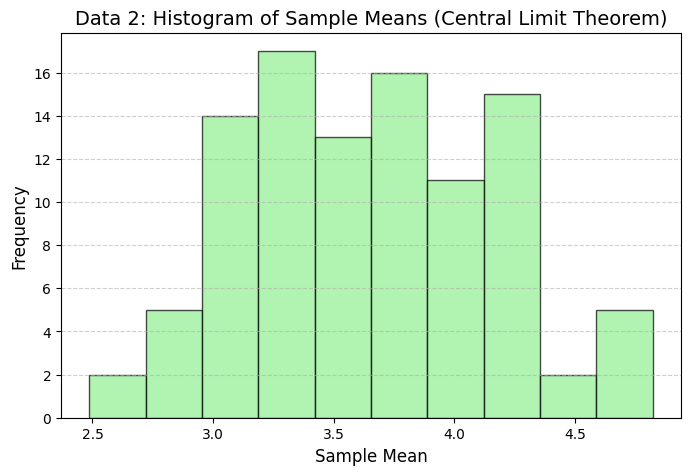

In [36]:

# Specify number of observations and size of samples
size = 50
n_samples = 100

# Generating 50 samples of size 50 each from the original data
sample_means2 = [np.random.choice(data2, size=size, replace=False).mean() for _ in range(n_samples)]

# Plotting the histogram of the sample means
plt.figure(figsize=(8, 5))
plt.hist(sample_means2, bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Data 2: Histogram of Sample Means (Central Limit Theorem)", fontsize=14)
plt.xlabel("Sample Mean", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Teste de normalidade

In [37]:
from scipy.stats import shapiro, ttest_ind

# 1. Teste de normalidade usando o teste de Shapiro-Wilk
normal_test1 = shapiro(sample_means1)
normal_test2 = shapiro(sample_means2)

print("Teste de Shapiro-Wilk para sample_means1:")
print(f"Estatística W = {normal_test1.statistic:.4f}, p-valor = {normal_test1.pvalue:.4f}")

print("\nTeste de Shapiro-Wilk para sample_means2:")
print(f"Estatística W = {normal_test2.statistic:.4f}, p-valor = {normal_test2.pvalue:.4f}")

# Verificar se ambos os p-valores são maiores que 0.05 (indicando normalidade)
if normal_test1.pvalue > 0.05 and normal_test2.pvalue > 0.05:
    print("\nAmbos os conjuntos de dados seguem uma distribuição normal. Aplicando o teste t para amostras independentes.")

    # 2. Aplicar o teste t para amostras independentes
    t_test = ttest_ind(sample_means1, sample_means2, equal_var=True)
    print("\nTeste t para amostras independentes:")
    print(f"Estatística t = {t_test.statistic:.4f}, p-valor = {t_test.pvalue:.4f}")

    # Interpretação do resultado
    if t_test.pvalue < 0.05:
        print("Resultado: Existe uma diferença estatisticamente significativa entre as médias dos dois conjuntos de dados.")
    else:
        print("Resultado: Não há diferença estatisticamente significativa entre as médias dos dois conjuntos de dados.")
else:
    print("\nPelo menos um dos conjuntos de dados não segue uma distribuição normal. Recomenda-se utilizar um teste não paramétrico como o teste de Mann-Whitney U.")

Teste de Shapiro-Wilk para sample_means1:
Estatística W = 0.9900, p-valor = 0.6635

Teste de Shapiro-Wilk para sample_means2:
Estatística W = 0.9849, p-valor = 0.3141

Ambos os conjuntos de dados seguem uma distribuição normal. Aplicando o teste t para amostras independentes.

Teste t para amostras independentes:
Estatística t = -29.3802, p-valor = 0.0000
Resultado: Existe uma diferença estatisticamente significativa entre as médias dos dois conjuntos de dados.
